### Read data and transform them into DataFrame

In [ ]:
fhand = open('train.txt') 
l = []
for line in fhand:
  line = line.rstrip()
  l.append(line.split(';'))
import pandas as pd
data = pd.DataFrame(l, columns=['sentence', 'emotion'])
data

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
fhand = open('test.txt')
l = []
for line in fhand:
  line = line.rstrip()
  l.append(line.split(';'))
testdata = pd.DataFrame(l, columns=['sentence', 'emotion'])
testdata

,sentence,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


### Data Visualization

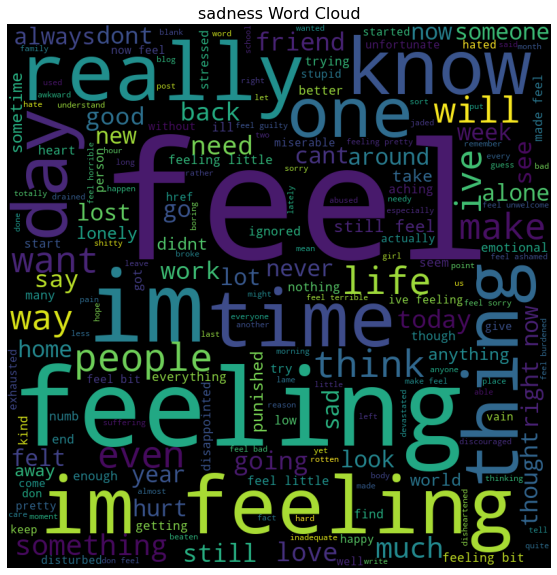

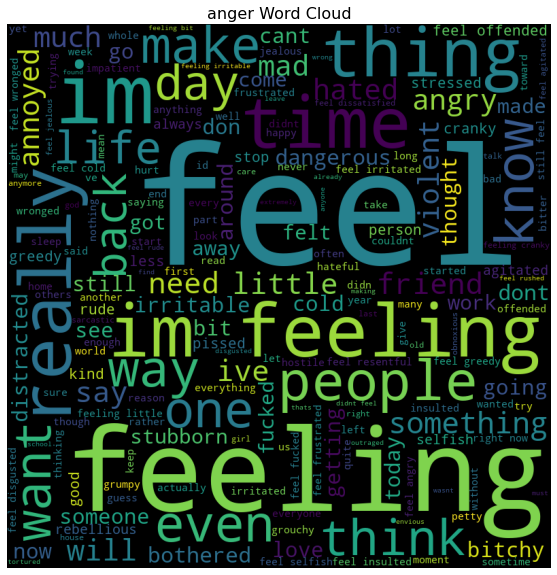

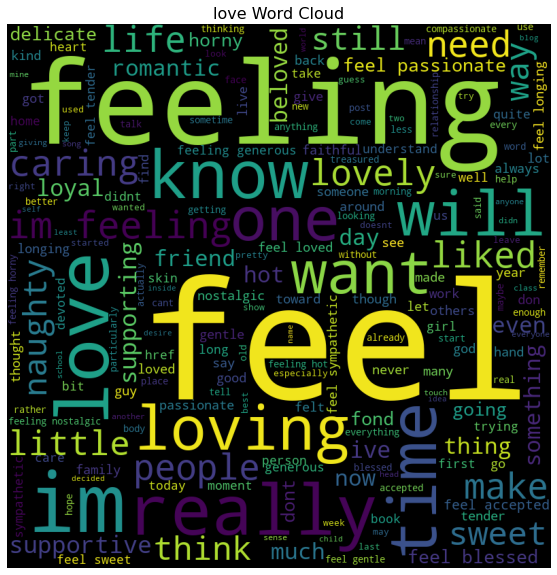

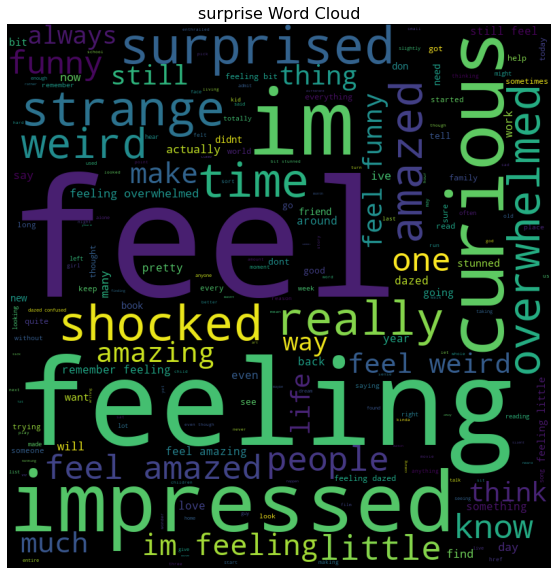

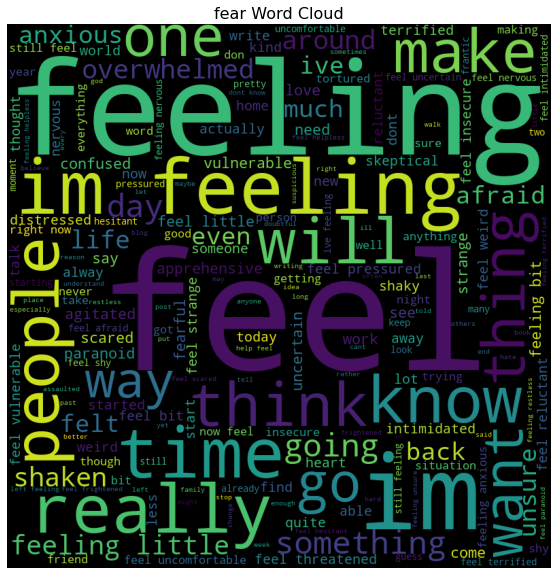

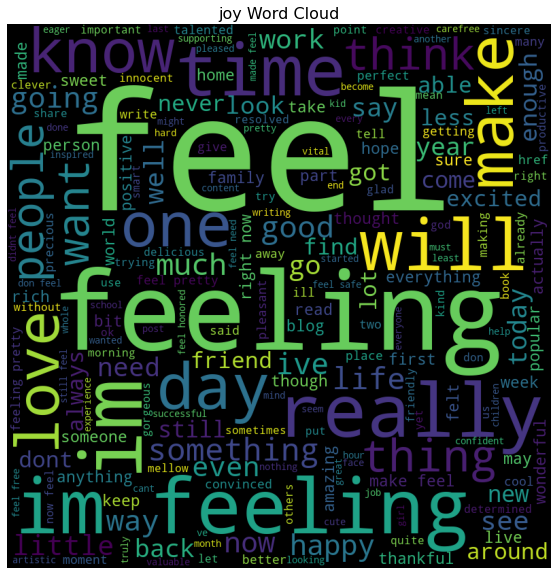

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud)
    plt.axis("off");
emotions_list = data['emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in data.loc[data['emotion'] == emotion,'sentence']])
    wordcloud = WordCloud(width = 800, height = 800).generate(text)
    words_cloud(wordcloud, emotion)

### y is the dummy matrix of the emotions

In [ ]:
emotion = pd.Series(data['emotion'])
y = pd.get_dummies(emotion)
y

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
15995,0,0,0,0,1,0
15996,0,0,0,0,1,0
15997,0,0,1,0,0,0
15998,1,0,0,0,0,0


In [ ]:
y_test = pd.get_dummies(testdata['emotion'])
y_test

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1995,1,0,0,0,0,0
1996,1,0,0,0,0,0
1997,0,0,1,0,0,0
1998,0,0,1,0,0,0


### x is the document-term matrix, here we use TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')
x = vectorizer.fit_transform(data['sentence']).toarray()
x_feature_names = vectorizer.get_feature_names()
x = pd.DataFrame(data=x, columns=x_feature_names)
x

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abilities,ability,able,absolute,absolutely,abuse,abused,accept,acceptable,...,york,youd,youll,young,younger,youre,youth,youve,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### x_test is the matrix that is tranformed into the document-term matrix, here we use transform() attribute from TfidfVectorizer

In [ ]:
x_test = vectorizer.transform(testdata['sentence']).toarray()
x_test = pd.DataFrame(data=x_test, columns=x_feature_names)
x_test

,abandoned,abilities,ability,able,absolute,absolutely,abuse,abused,accept,acceptable,...,york,youd,youll,young,younger,youre,youth,youve,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import SKLearn package and run Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
model.coef_

array([[ 0.02306418, -0.11895702, -0.02741777, ..., -0.01927262,
         0.04270317, -0.04588979],
       [-0.03602502, -0.30177437, -0.0200606 , ..., -0.1384582 ,
        -0.31548676, -0.0951641 ],
       [-0.38760584,  0.18655669, -0.13221414, ...,  0.12346902,
         0.45275521,  0.37068329],
       [-0.03000205, -0.04556136,  0.11349781, ...,  0.13021378,
        -0.02861713,  0.06648232],
       [ 0.42154677,  0.33393803, -0.00169397, ..., -0.07677444,
        -0.09703359, -0.24924021],
       [ 0.00902195, -0.05420197,  0.06788867, ..., -0.01917754,
        -0.0543209 , -0.04687151]])

In [ ]:
model.coef_.shape

(6, 3152)

### plug in x_test to make predictions

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([[-2.60178523e-02,  1.74638384e-02, -5.44893566e-02,
         5.60063799e-03,  1.05843130e+00, -9.88565060e-04],
       [ 1.71537227e-02, -3.62970837e-02, -2.58301245e-03,
        -4.04018350e-02,  1.07757069e+00, -1.54424817e-02],
       [ 7.70744905e-02,  8.06230566e-02,  4.80549148e-01,
        -1.65735812e-01,  5.41916276e-01, -1.44271595e-02],
       ...,
       [-5.75299783e-03,  1.03912733e-01,  7.64638130e-01,
         2.04053515e-02,  1.45881346e-01, -2.90845631e-02],
       [-6.57260525e-03, -4.30154417e-02,  8.02865523e-01,
         1.07507906e-02,  2.22530310e-01,  1.34414229e-02],
       [ 8.99970807e-03,  3.53126909e-01,  2.11171437e-01,
         9.84764578e-02,  1.19994247e-01,  2.08231241e-01]])

### MSE

In [ ]:
mean_squared_error(y_test, y_predict)


0.04298275131328964

### R - Squared

In [ ]:
r2_score(y_test, y_predict)

0.6288045608057556

### Figure out the emotion states in the testing results

In [ ]:
y_predict = pd.DataFrame(y_predict, columns=y.columns)
y_predict

,anger,fear,joy,love,sadness,surprise
0,-0.026018,0.017464,-0.054489,0.005601,1.058431,-0.000989
1,0.017154,-0.036297,-0.002583,-0.040402,1.077571,-0.015442
2,0.077074,0.080623,0.480549,-0.165736,0.541916,-0.014427
3,0.147084,0.160985,0.620174,-0.021501,0.106262,-0.013004
4,-0.026432,-0.013301,-0.065879,-0.048853,1.156029,-0.001564
...,...,...,...,...,...,...
1995,0.719365,0.114197,0.011362,-0.019899,0.172717,0.002257
1996,0.943448,-0.077609,-0.111068,0.194406,0.001362,0.049463
1997,-0.005753,0.103913,0.764638,0.020405,0.145881,-0.029085
1998,-0.006573,-0.043015,0.802866,0.010751,0.222530,0.013441


In [ ]:
y_predict = y_predict.apply(lambda x: x.argmax(), axis=1)
y_predict

0       4
1       4
2       4
3       2
4       4
       ..
1995    0
1996    0
1997    2
1998    2
1999    1
Length: 2000, dtype: int64

In [ ]:
d = {k: v for k, v in enumerate(y.columns)}
d  

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

In [ ]:
for i in range(len(y_predict)):
  y_predict[i] = d[y_predict[i]]

y_predict

0       sadness
1       sadness
2       sadness
3           joy
4       sadness
         ...   
1995      anger
1996      anger
1997        joy
1998        joy
1999       fear
Length: 2000, dtype: object

In [ ]:
y_predict

0       sadness
1       sadness
2       sadness
3           joy
4       sadness
         ...   
1995      anger
1996      anger
1997        joy
1998        joy
1999       fear
Length: 2000, dtype: object

### The number of correct predictions

In [ ]:
n = 0
for i in range(len(y_predict)):
  if y_predict[i] == testdata['emotion'][i]:
    n += 1
n

1754

### Correctness of the predicting model

In [ ]:
n/2000

0.877